In [1]:
import numpy as np
import matplotlib.pyplot as plt

from toygrad import MLP, Layer, Sigmoid, SoftMax, ReLU, TanH, Linear, SquaredError, CategoricalCrossEntropy
from plot import plot_network, plot_train_test_losses

np.random.seed(2137)
plt.rcParams["figure.figsize"] = (20,20)

TRAINING_DATASET = "data/mnist/train.csv"
TESTING_DATASET = "data/mnist/test.csv"

def one_hot(y):
    y = y.astype(int)
    encoded = np.zeros((y.size, y.max()+1))
    encoded[np.arange(y.size), y.reshape(1, -1)] = 1
    return encoded

def read_mnist(path):
    """Read and shuffle the dataset"""
    data = np.genfromtxt(path, delimiter=',')[1:]
    np.random.shuffle(data)
    X = data[:, 1:]
    Y = one_hot(data[:, 0].reshape(-1, 1))
    return X, Y

def plot_images(X):
    # Disregard elements which would not fit in square
    size = int(len(X)**(1/2))
    x = X[:size**2]
    plt.imshow(np.concatenate(x.reshape(size, size*28, 28), axis=1))
    plt.show()
    
X, Y = read_mnist(TRAINING_DATASET)

train_size = int(len(X)*0.8)

X_train, Y_train = X[:train_size], Y[:train_size]
X_test, Y_test = X[train_size:], Y[train_size:]

In [8]:
layers = [
    Layer(in_size=28*28, out_size=16, activ_function=Sigmoid),
    Layer(in_size=16, out_size=16, activ_function=Sigmoid),
    Layer(in_size=16, out_size=10, activ_function=Sigmoid),
    Layer(in_size=10, out_size=10, activ_function=SoftMax),
]
m = MLP(
    layers=layers,
    loss=CategoricalCrossEntropy,
    #accurracy=PercentCorrect,
    bias=True,
    batch_size=8,
    epochs=100,
    momentum=0.1,
    learning_rate=0.0001,
)

In [ ]:
stats = m.train(X_train, Y_train, X_test, Y_test)
plot_train_test_losses(**stats, title=f"Train/Test losses per epoch")

Epoch    1 - train loss 0.259 (std:0.03) - test loss 0.257 (std:0.08)
Epoch    2 - train loss 0.256 (std:0.03) - test loss 0.255 (std:0.07)
Epoch    3 - train loss 0.254 (std:0.03) - test loss 0.253 (std:0.07)
Epoch    4 - train loss 0.252 (std:0.03) - test loss 0.251 (std:0.07)
Epoch    5 - train loss 0.250 (std:0.02) - test loss 0.250 (std:0.07)
Epoch    6 - train loss 0.249 (std:0.02) - test loss 0.248 (std:0.07)
Epoch    7 - train loss 0.248 (std:0.02) - test loss 0.247 (std:0.06)
Epoch    8 - train loss 0.247 (std:0.02) - test loss 0.246 (std:0.06)
Epoch    9 - train loss 0.246 (std:0.02) - test loss 0.245 (std:0.06)


### Let's plot 400 random images and take a look at what is our input data

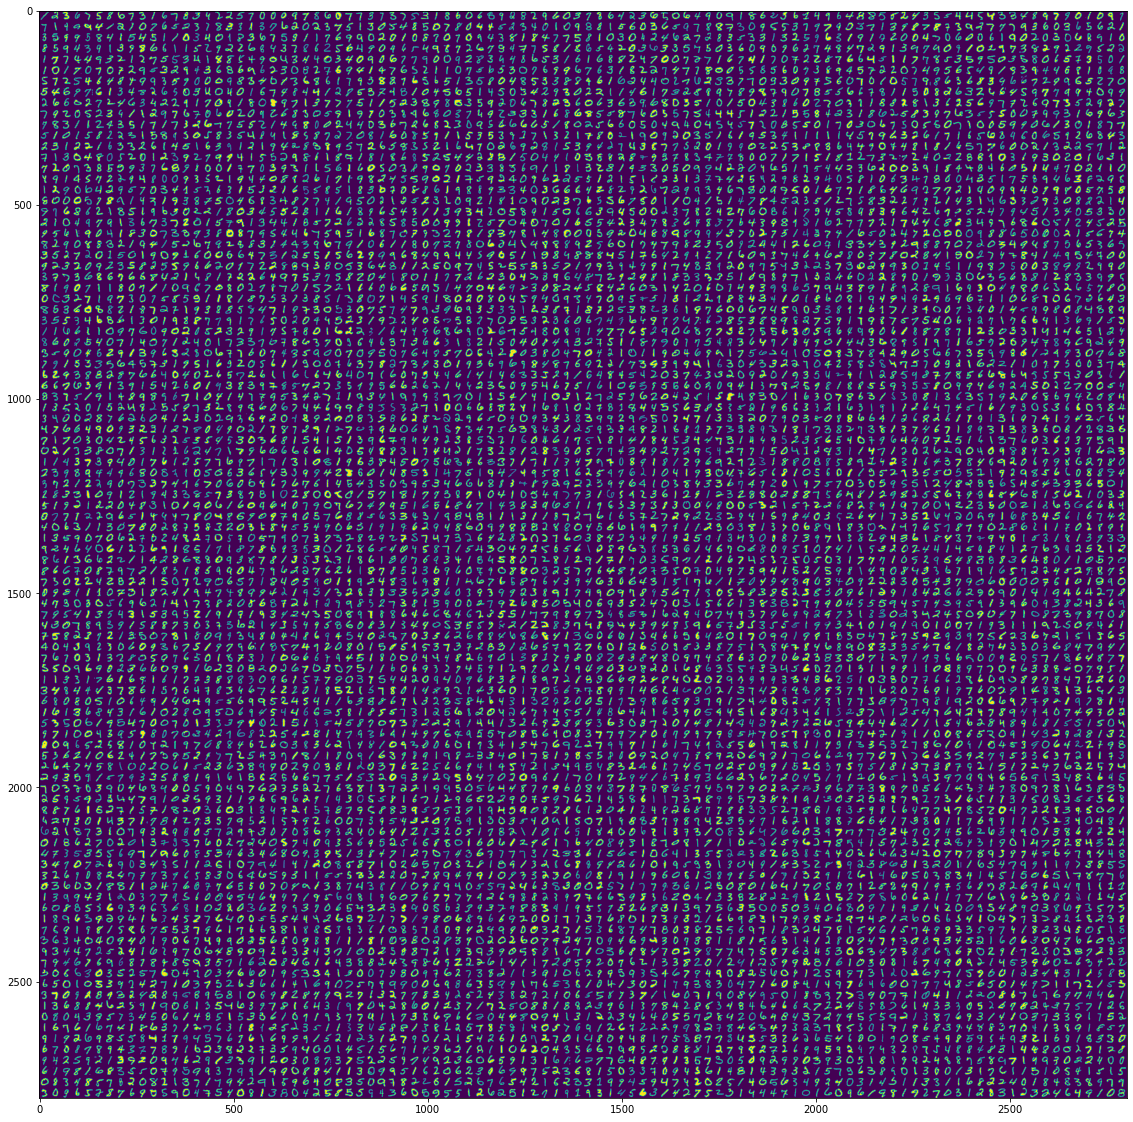

In [2]:
plot_images(X[:10000])